## Solutions

### Exercise 1

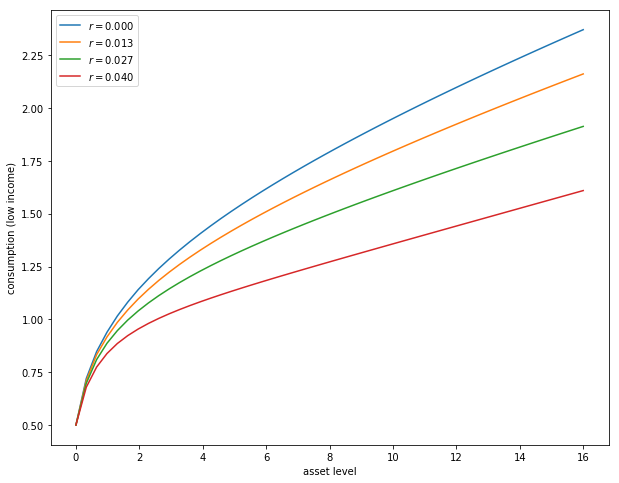

In [7]:
r_vals = np.linspace(0, 0.04, 4)

fig, ax = plt.subplots(figsize=(10, 8))
for r_val in r_vals:
    cp = ConsumerProblem(r=r_val)
    σ_star = solve_model(cp, verbose=False)
    ax.plot(cp.asset_grid, σ_star[:, 0], label=f'$r = {r_val:.3f}$')

ax.set(xlabel='asset level', ylabel='consumption (low income)')
ax.legend()
plt.show()

### Exercise 2

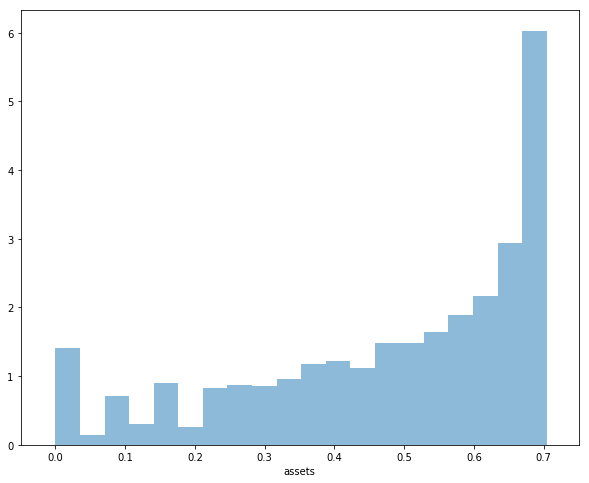

In [8]:
from quantecon import MarkovChain

def compute_asset_series(cp, T=500000, verbose=False):
    """
    Simulates a time series of length T for assets, given optimal savings
    behavior.

    cp is an instance of ConsumerProblem
    """
    Π, z_vals, R = cp.Π, cp.z_vals, cp.R  # Simplify names
    mc = MarkovChain(Π)
    σ_star = solve_model(cp, verbose=False)
    cf = lambda a, i_z: interp(cp.asset_grid, σ_star[:, i_z], a)
    a = np.zeros(T+1)
    z_seq = mc.simulate(T)
    for t in range(T):
        i_z = z_seq[t]
        a[t+1] = R * a[t] + z_vals[i_z] - cf(a[t], i_z)
    return a

cp = ConsumerProblem(r=0.03, grid_max=4)
a = compute_asset_series(cp)

fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(a, bins=20, alpha=0.5, density=True)
ax.set(xlabel='assets', xlim=(-0.05, 0.75))
plt.show()

### Exercise 3

Finished iteration b = 1


Finished iteration b = 3


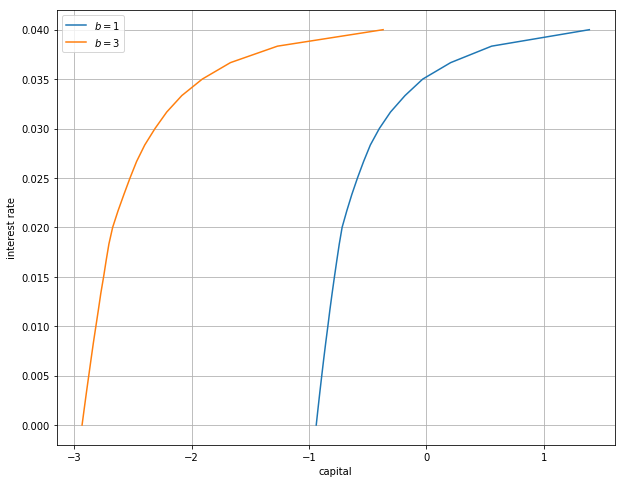

In [9]:
M = 25
r_vals = np.linspace(0, 0.04, M)
fig, ax = plt.subplots(figsize=(10, 8))

for b in (1, 3):
    asset_mean = []
    for r_val in r_vals:
        cp = ConsumerProblem(r=r_val, b=b)
        mean = np.mean(compute_asset_series(cp, T=250000))
        asset_mean.append(mean)
    ax.plot(asset_mean, r_vals, label=f'$b = {b:d}$')
    print(f"Finished iteration b = {b:d}")

ax.set(xlabel='capital', ylabel='interest rate')
ax.grid()
ax.legend()
plt.show()